# **Haberman's Survival Data Set**

* A data set to learn basics
* The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings     Hospital.
* On the survival of patients who had undergone surgery for breast cancer.

#### **Source**
Dataset: https://www.kaggle.com/gilsousa/habermans-survival-data-set

#### **Attribute Information**

* Age of patient at time of operation (numerical)
* Patient’s year of operation (year — 1900, numerical)
- Number of positive auxillary nodes detected (numerical)
- Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 years

Additional information About **Auxillary Note** ,Lymph node status shows whether or not the lymph nodes in the underarm area (axillary nodes) contain cancer: Lymph node-negative means the lymph nodes do not contain cancer. Lymph node-positive means the lymph nodes contain cancer.

#### **Objective**
To predict whether a patient will survive after 5 years or not based upon the patient’s age,his/her operation_year and the number of positive lymph nodes.

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.environ['PATH']
# Load haberman csv file.

# cancer_df = pd.read_csv(r'C:\Users\DEEL\Machine Learning\Assignments\habermans-survival-data-set\haberman.csv')
cancer_df = pd.read_csv(r'C:\Users\DEEL\Machine Learning\Assignments\habermans-survival-dataset\haberman.csv')

# Load some data using head query
print(cancer_df.head())

   age  year_of_treatement  positive_axillary_node  survival_status
0   30                  64                       1                1
1   30                  62                       3                1
2   30                  65                       0                1
3   31                  59                       2                1
4   31                  65                       4                1


In [7]:
# understanding size and shape
print(cancer_df.shape)

(306, 4)


In [10]:
# Coloumns and additional information
print (cancer_df.columns)
print(cancer_df.info())

Index(['Age', 'Op_year', 'Axil Node', 'Surv_Status'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age            306 non-null int64
Op_year        306 non-null int64
Axil Node      306 non-null int64
Surv_Status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB
None


In [19]:
cancer_df['survival_status'].value_counts()

1    225
2     81
Name: survival_status, dtype: int64

#### **Observation** 
- No missing values
- All values found in Integer format
- Seems unbalance dataset

## Univariate Analysis

In [63]:
# Analyze survival figures
print("Patients survied 5 years or more")
survived_df = cancer_df.loc[cancer_df['survival_status']== 1]
print(survived.describe())

print('--'*40)
# Analyze died figures
print("Patients died within 5 years")
died_df = cancer_df.loc[cancer_df['survival_status'] ==2]
print(died_df.describe())

Patients survied 5 years or more
              age  year_of_treatement  positive_axillary_node  survival_status
count  225.000000          225.000000              225.000000            225.0
mean    52.017778           62.862222                2.791111              1.0
std     11.012154            3.222915                5.870318              0.0
min     30.000000           58.000000                0.000000              1.0
25%     43.000000           60.000000                0.000000              1.0
50%     52.000000           63.000000                0.000000              1.0
75%     60.000000           66.000000                3.000000              1.0
max     77.000000           69.000000               46.000000              1.0
--------------------------------------------------------------------------------
Patients died within 5 years
             age  year_of_treatement  positive_axillary_node  survival_status
count  81.000000           81.000000               81.000000        

#### Observations

- As earlier mention it is **imbalance** dataset, 225 patients who survival and 81 patients who died.
- positive axillary node seems important factor, patients those who survived having auxillary node mean = '2.79111' and patients those who died having auxillary node mean = '7.456790', which can be significant feature to observe.
- On other hand 'age' and 'year of treatement' feature are almost same for 'survived' and 'died' patients.

### Histogram, PDF

#### Auxillary Feature

C:\Users\DEEL\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\DEEL\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


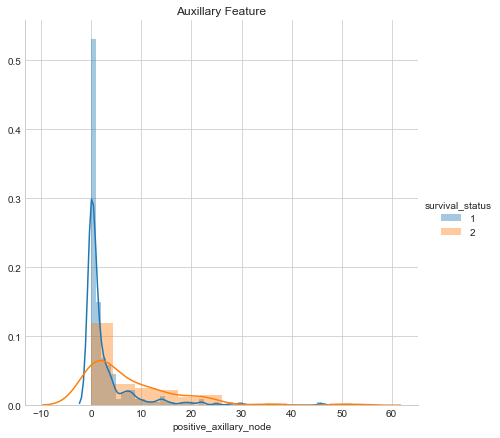

In [67]:

# First study auxillary feature
sns.set_style("whitegrid");
sns.FacetGrid(cancer_df, hue = 'survival_status', size = 6).map(sns.distplot,"positive_axillary_node").add_legend();
plt.title("Auxillary Feature")
plt.show()


#### Age Feature

C:\Users\DEEL\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\DEEL\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


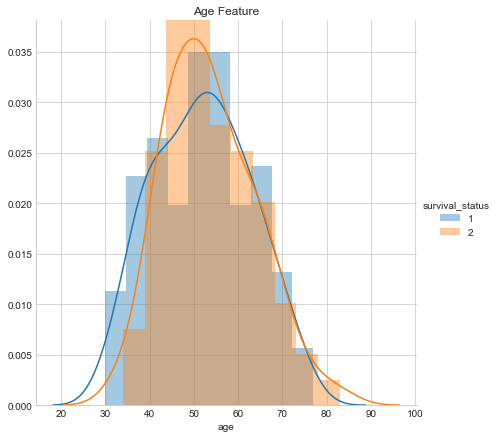

In [72]:
# Second study age feature
sns.FacetGrid(cancer_df, hue="survival_status", size =6).map(sns.distplot, "age",bins=10).add_legend();
plt.title("Age Feature")
plt.show()


#### Years of Treatement

C:\Users\DEEL\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\DEEL\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


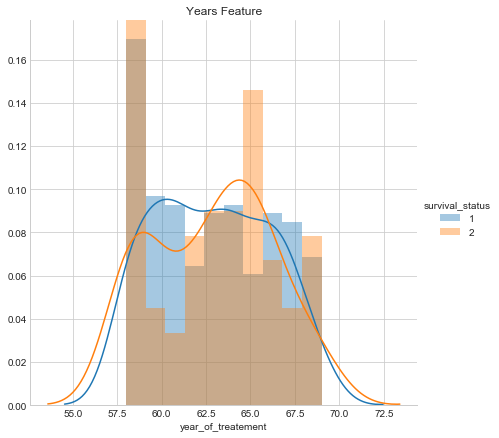

In [71]:
# Second study 'years of treatement' feature
sns.FacetGrid(cancer_df, hue="survival_status", size =6).map(sns.distplot, "year_of_treatement", bins=10).add_legend();
plt.title("Years Feature")
plt.show()


#### Observations

- We can clearly observe that 'auxillary / lymph' node is most useful feature. On other hand 'age' and 'year_of_treatement' feature not giving clear picture.
- Also we should note that in year 65, there is largest number of died.

### CDF

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


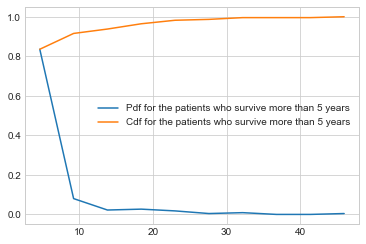

In [77]:
# plot CDF for 'auxillary' feature of SURVIVED patients

counts, bin_edges = np.histogram(survived_df['positive_axillary_node'], bins=10, 
                                 density = True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['Pdf for the patients who survive more than 5 years',
            'Cdf for the patients who survive more than 5 years'])
plt.show()


#### Observations
- Around 91% patients survived when their auxillary/ lymph node is less than 10

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


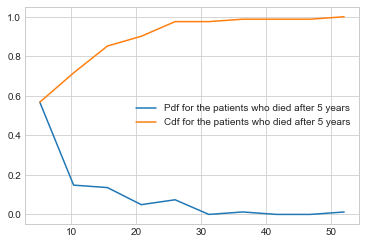

In [79]:
# # plot CDF for 'auxillary' feature of DIED patients 
counts, bin_edges = np.histogram(died_df['positive_axillary_node'], bins=10, 
                                 density = True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['Pdf for the patients who died after 5 years',
            'Cdf for the patients who died after 5 years'])
plt.show()

#### Observation
- As auxillary / lymph node is increases died possibilities increases.
- 90% patients died who having lymph node is more than 20.

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


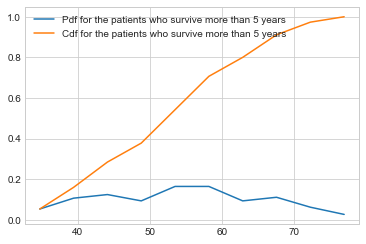

In [80]:
# plot CDF for 'age' feature of SURVIVED patients

counts, bin_edges = np.histogram(survived_df['age'], bins=10, 
                                 density = True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['Pdf for the patients who survive more than 5 years',
            'Cdf for the patients who survive more than 5 years'])
plt.show()


[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


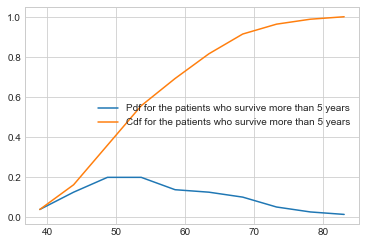

In [81]:
# plot CDF for 'auxillary' feature of DIED patients

counts, bin_edges = np.histogram(died_df['age'], bins=10, 
                                 density = True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['Pdf for the patients who survive more than 5 years',
            'Cdf for the patients who survive more than 5 years'])
plt.show()


#### Observation
- It is very hard to predict died causes basis on 'age' feature because both values seems equals.

### Median, Percentile, Quantile, IQR, MAD

In [83]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(survived_df["positive_axillary_node"]))
#Median with an outlier
print(np.median(np.append(survived_df["positive_axillary_node"],50)));
print(np.median(died_df["positive_axillary_node"]))

print("\nQuantiles:")
print(np.percentile(survived_df["positive_axillary_node"],np.arange(0, 100, 25)))
print(np.percentile(died_df["positive_axillary_node"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(survived_df["positive_axillary_node"],90))
print(np.percentile(died_df["positive_axillary_node"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(survived_df["positive_axillary_node"]))
print(robust.mad(died_df["positive_axillary_node"]))


Medians:
0.0
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentiles:
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


### Box plot and Whiskers

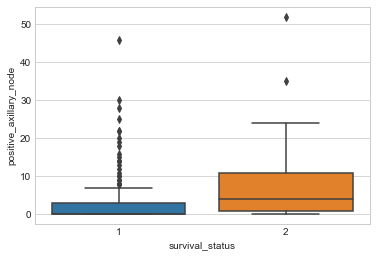

In [87]:
sns.boxplot(x='survival_status',y='positive_axillary_node', data=cancer_df)
plt.show()

#### Observations

- 25% patients(ie 50%-75%) who died having positive axillary / lymph node more than 4 or in other words.
- 75% patients survived who having axillary lymph node is less than 4.


### Violin plots

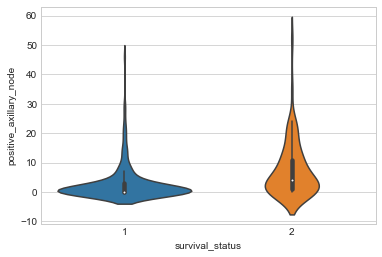

In [91]:
sns.violinplot(x="survival_status", y="positive_axillary_node", data=cancer_df, size=5)
plt.show()

#### Observations
- The number of positive auxillary /lymph nodes of the survivors is highly densed from 0 to 5.
- Almost 80% of the patients have less than or equal to 5 positive lymph survived more than 5 years.
- On other hand, if 80% patient died who having positive auxillary/ lymph node upto 10 or more.

#### Contour plot

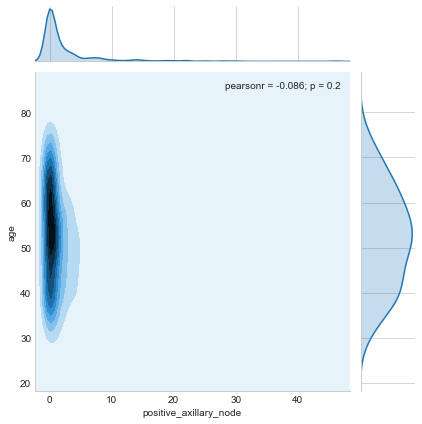

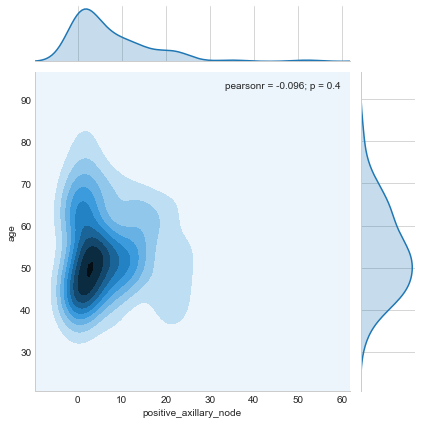

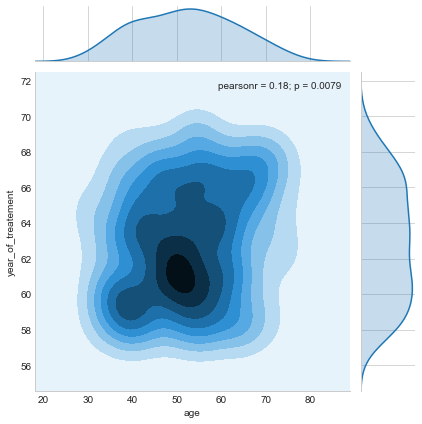

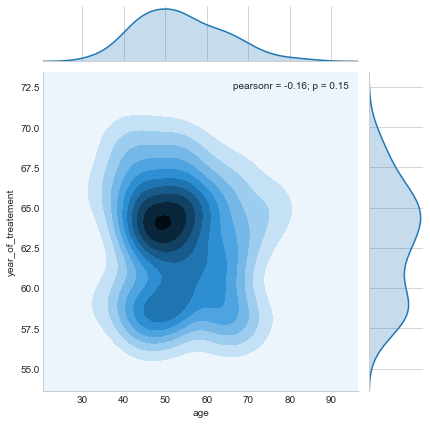

In [102]:
# contour plot using age and auxillary node

# auxillary vs age for SURVIVED patients
sns.jointplot(x="positive_axillary_node", y="age", data = survived_df , kind="kde");

# auxillary vs age for DIED patients
sns.jointplot(x="positive_axillary_node", y="age", data = died_df , kind="kde");

# # 'year of treatement'  vs age for SURVIVED patients
# sns.jointplot(x="age", y="year_of_treatement", data=survived_df, kind="kde");

# 'year of treatement' vs age for DIED patients
sns.jointplot(x="age", y="year_of_treatement", data=died_df, kind="kde");
plt.show()

#### Observations
- There is more chance of died when age is 50 and auxillary node is 4.
- 'Auxillary node' is only feature which play key role, age feature is not useful.
- It is noted that in 1965 year there was lot of dead number.

### **2-D Scatter Plot** 

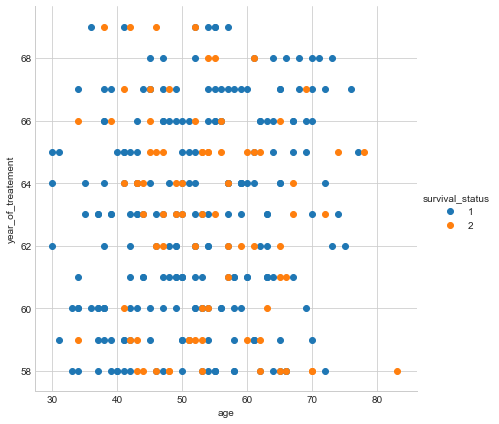

In [29]:
# cancer_df.plot(kind='scatter', x='age',y='year_of_treatement')
sns.set_style('whitegrid')
sns.FacetGrid(cancer_df,hue="survival_status",size=6) \
    .map(plt.scatter,"age","year_of_treatement") \
    .add_legend()
plt.show()

# try to plot all the points on graph
# looking at first sight it is really hard to diffentiate blue and red points
# Points are really scattered

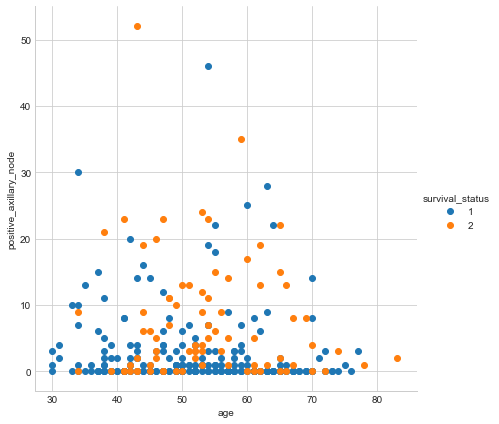

In [44]:
# checking 'Age' vs 'number of auxillary node' 

sns.set_style('whitegrid')
sns.FacetGrid(cancer_df,hue="survival_status",size=6) \
    .map(plt.scatter,"age","positive_axillary_node") \
    .add_legend()
plt.show()

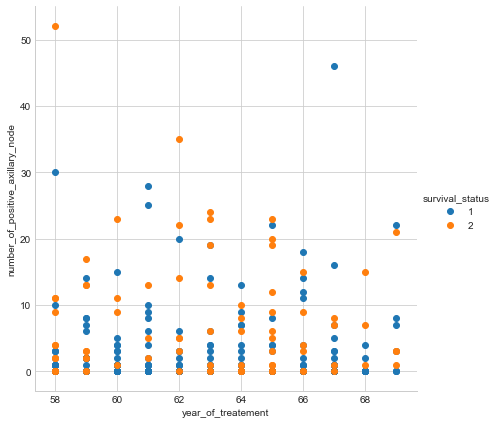

In [40]:
# year of  treatement vs Auxillary

sns.set_style('whitegrid')
sns.FacetGrid(cancer_df,hue="survival_status",size=6) \
    .map(plt.scatter,"year_of_treatement","positive_axillary_node") \
    .add_legend()
plt.show()

#### Observation
- On x axis we have age and on y axis we have years of treament years of treatement
- All points are scattered all over, no separation can be observe.

#### Pair-Plot

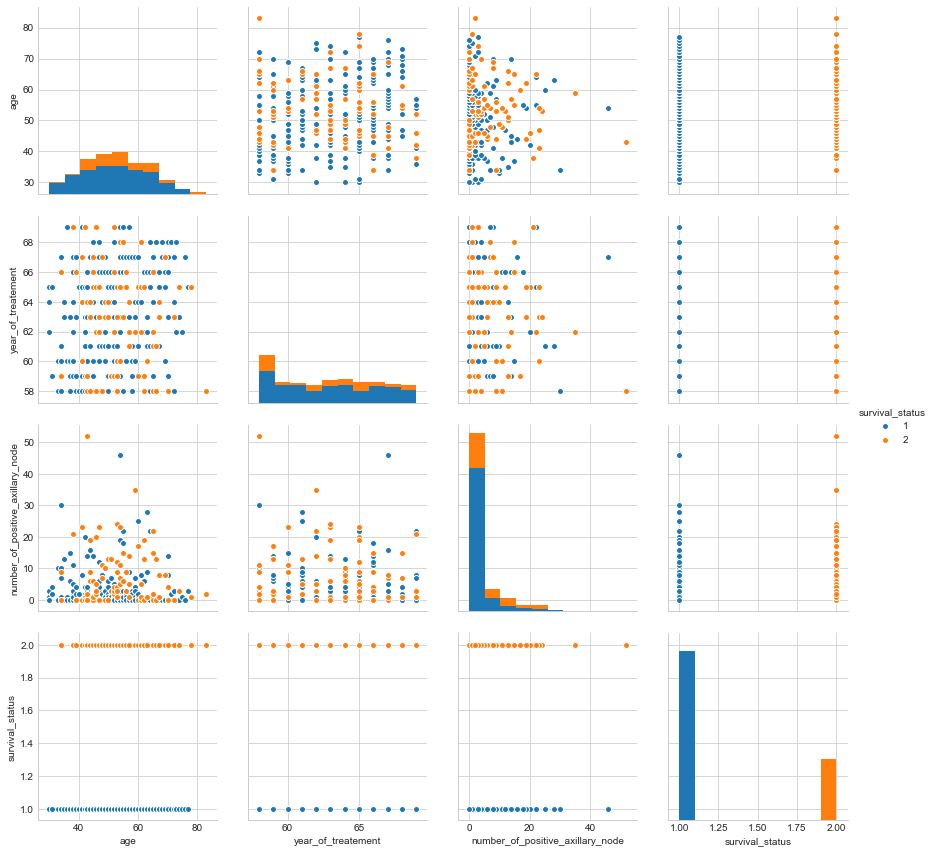

In [38]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(cancer_df, hue ="survival_status", size = 3);
plt.show()

#### Observations

- It is hard to conclude anything is difficult with 'age' and 'year_of_treatement' feature.
- Auxillary/lymph node play significant role.